# Task 5 — Superstore EDA & KPIs (Provided SampleSuperstore.csv)
We compute KPIs and visualize sales/profit across time and categories. Each chart is explained below.

In [1]:

import numpy as np, pandas as pd, matplotlib.pyplot as plt
from math import sqrt

import os
path = "./data/SampleSuperstore.csv"
assert os.path.exists(path), "Place SampleSuperstore.csv in ./data"
df = pd.read_csv(path, encoding='utf-8', low_memory=False)
df.columns = [c.strip() for c in df.columns]

# Find standard columns
date_col = next((c for c in df.columns if c.lower() in ["order date","order_date","date"]), None)
if date_col:
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce')

for c in ["Sales","Profit","Quantity","Discount"]:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')

df.head()


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### KPIs
Total Sales, Total Profit, and Unique Customers give quick business health insight.

In [2]:

total_sales = float(np.nansum(df.get('Sales', pd.Series(dtype=float))))
total_profit = float(np.nansum(df.get('Profit', pd.Series(dtype=float))))
unique_customers = int(df.get('Customer Name', pd.Series(dtype=object)).nunique()
                       if 'Customer Name' in df.columns else 0)
print({"Total Sales": round(total_sales,2), "Total Profit": round(total_profit,2), "Unique Customers": unique_customers})


{'Total Sales': 2297200.86, 'Total Profit': 286397.02, 'Unique Customers': 0}


### 1) Monthly Sales Trend
Seasonality and growth patterns in revenue.

In [3]:

if date_col and 'Sales' in df.columns:
    ts = df.groupby(pd.Grouper(key=date_col, freq='MS'))['Sales'].sum().dropna()
    plt.figure(figsize=(9,3)); plt.plot(ts.index, ts.values)
    plt.title("Monthly Sales"); plt.xlabel("Month"); plt.ylabel("Sales"); plt.show()


### 2) Monthly Profit Trend
Track profitability vs sales.

In [4]:

if date_col and 'Profit' in df.columns:
    tp = df.groupby(pd.Grouper(key=date_col, freq='MS'))['Profit'].sum().dropna()
    plt.figure(figsize=(9,3)); plt.plot(tp.index, tp.values)
    plt.title("Monthly Profit"); plt.xlabel("Month"); plt.ylabel("Profit"); plt.show()


### 3) Sales by Category
Which product categories drive revenue.

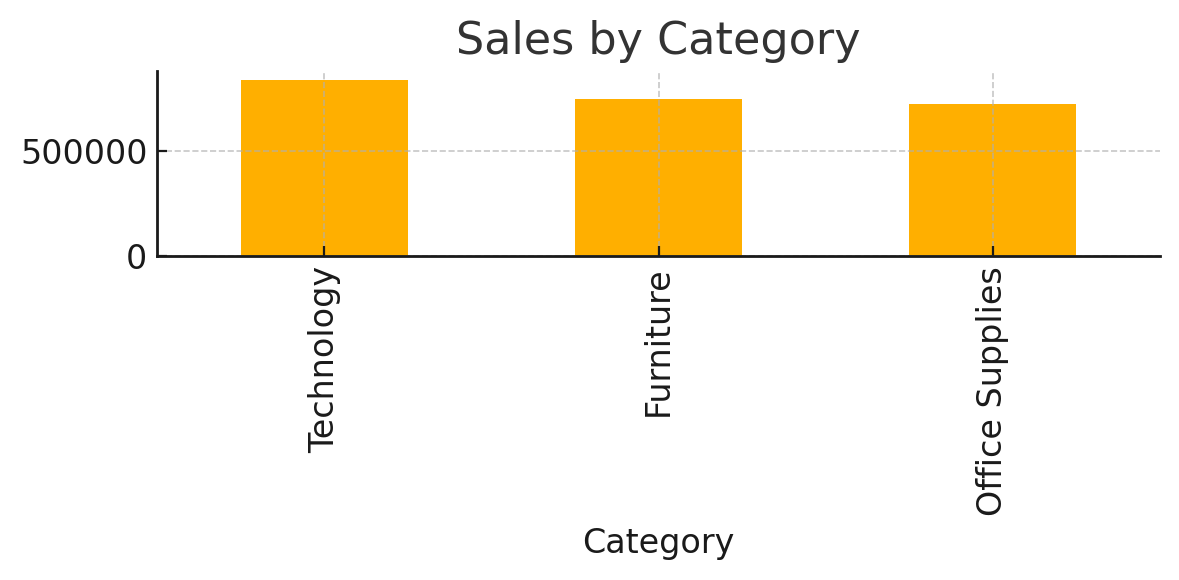

In [5]:

if 'Category' in df.columns and 'Sales' in df.columns:
    agg = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
    agg.plot(kind='bar', figsize=(6,3), title="Sales by Category"); plt.tight_layout(); plt.show()


### 4) Profit by Category
Some categories sell a lot but aren’t profitable.

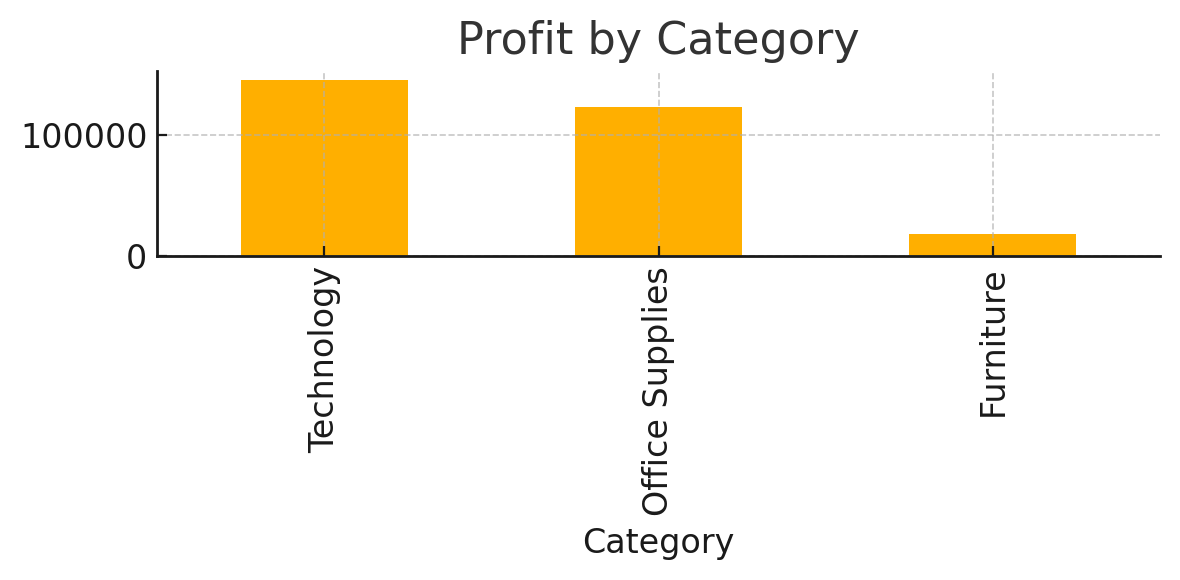

In [6]:

if 'Category' in df.columns and 'Profit' in df.columns:
    agg = df.groupby('Category')['Profit'].sum().sort_values(ascending=False)
    agg.plot(kind='bar', figsize=(6,3), title="Profit by Category"); plt.tight_layout(); plt.show()


### 5) Top 10 Sub-Category by Sales
Identifies best-sellers.

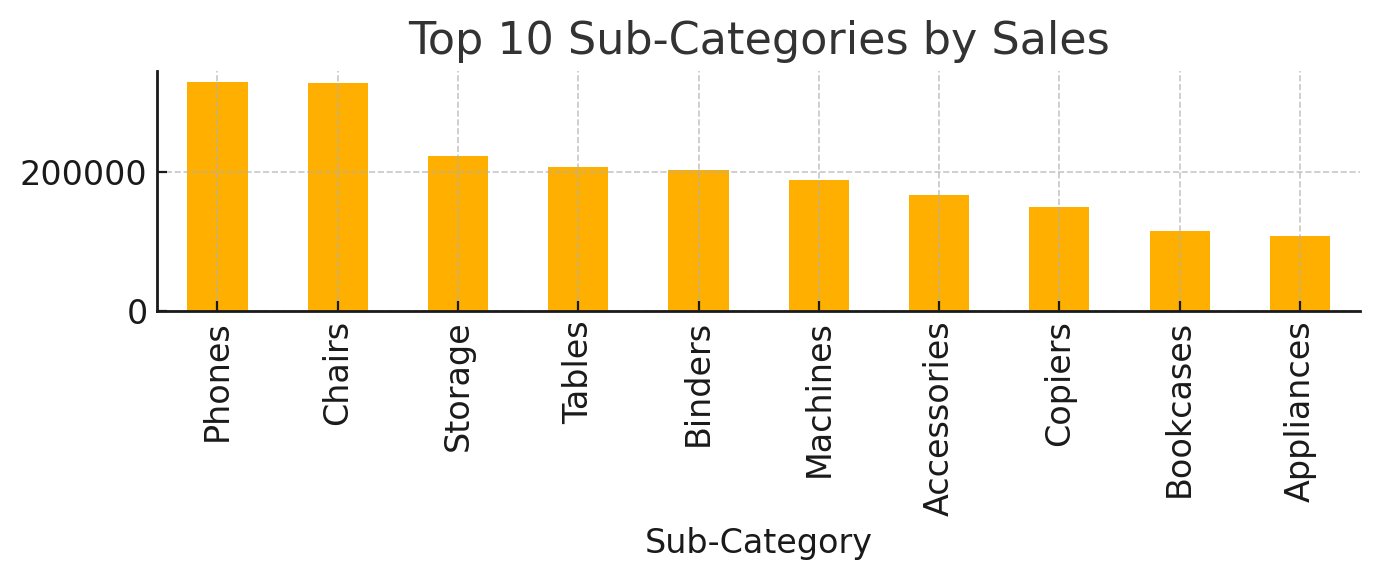

In [7]:

if 'Sub-Category' in df.columns and 'Sales' in df.columns:
    top = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).head(10)
    top.plot(kind='bar', figsize=(7,3), title="Top 10 Sub-Categories by Sales"); plt.tight_layout(); plt.show()


### 6) Sales by Region
Geographic performance at a high level.

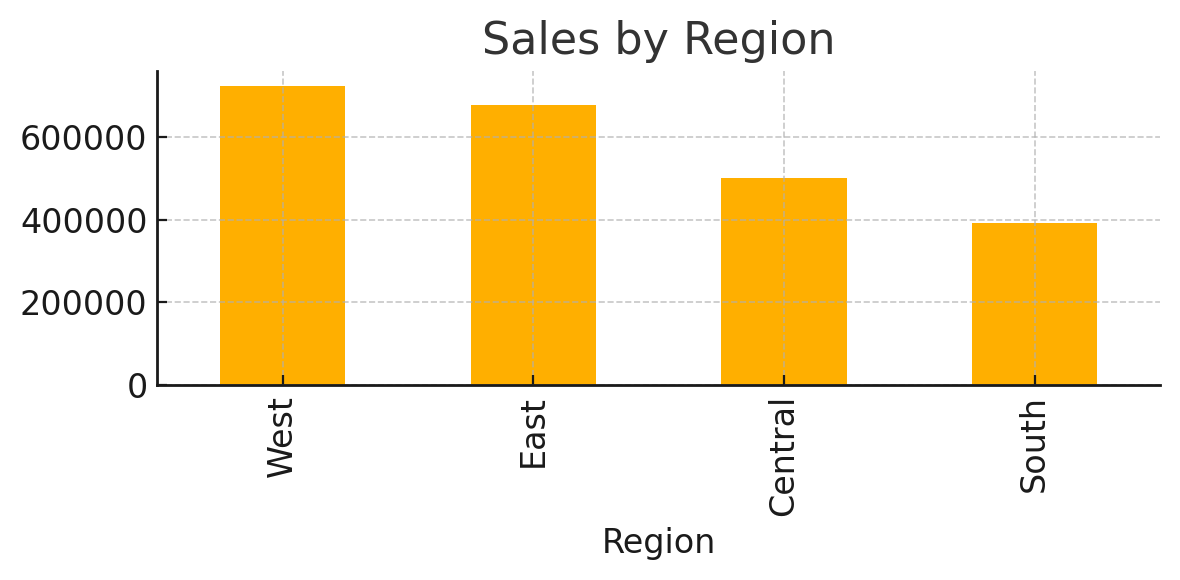

In [8]:

if 'Region' in df.columns and 'Sales' in df.columns:
    reg = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
    reg.plot(kind='bar', figsize=(6,3), title="Sales by Region"); plt.tight_layout(); plt.show()


### 7) Profit vs Sales (Scatter by Segment)
Shows margin dynamics across segments.

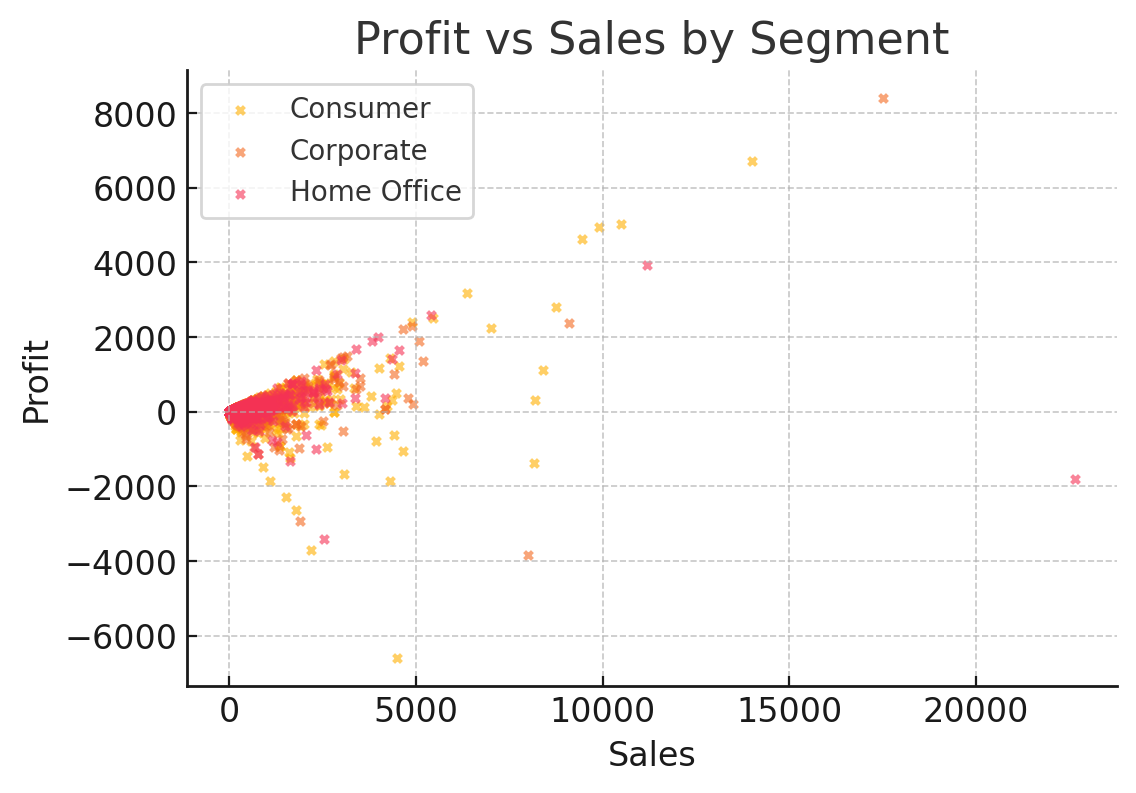

In [9]:

if 'Sales' in df.columns and 'Profit' in df.columns and 'Segment' in df.columns:
    plt.figure(figsize=(6,4))
    segments = df['Segment'].dropna().unique().tolist()
    for sname in segments:
        sub = df[df['Segment']==sname]
        plt.scatter(sub['Sales'], sub['Profit'], s=8, label=sname, alpha=0.6)
    plt.title("Profit vs Sales by Segment"); plt.xlabel("Sales"); plt.ylabel("Profit"); plt.legend(); plt.show()
